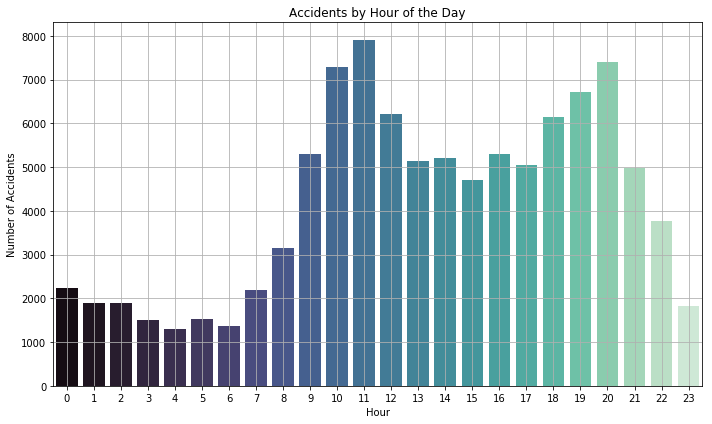

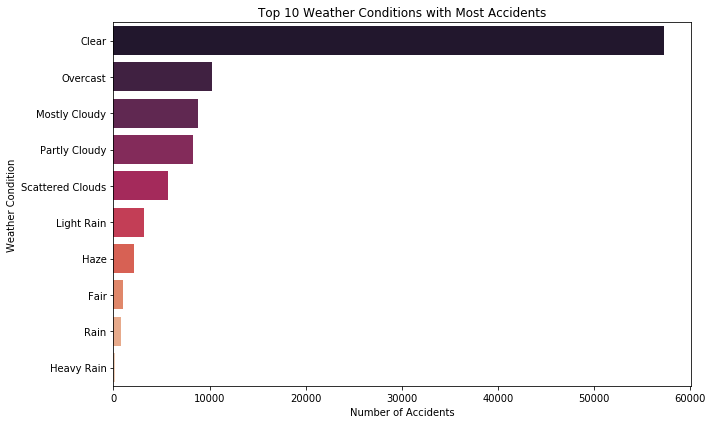

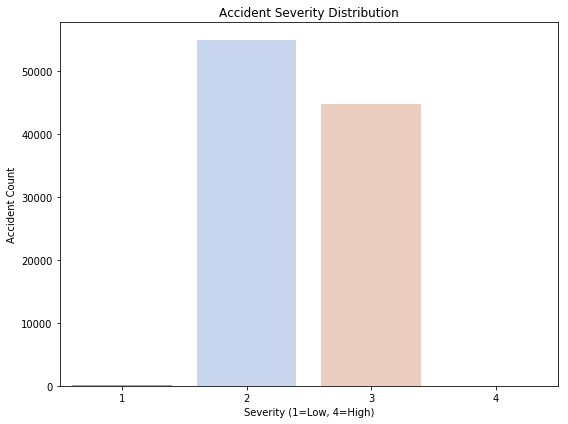

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with correct encoding
df = pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\US_Accidents_March23.csv\US_Accidents_March23.csv", nrows=100000, encoding='ISO-8859-1')

# Convert Start_Time column to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract useful features
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

# PLOT 1: Accidents by Hour of the Day
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df, palette='mako')
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()

# PLOT 2: Top 10 Weather Conditions with Most Accidents
plt.figure(figsize=(10,6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
sns.countplot(y='Weather_Condition', data=df[df['Weather_Condition'].isin(top_weather)],
              order=top_weather, palette='rocket')
plt.title("Top 10 Weather Conditions with Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

# PLOT 3: Severity Count (as proxy for road conditions)
plt.figure(figsize=(8,6))
sns.countplot(x='Severity', data=df, palette='coolwarm')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity (1=Low, 4=High)")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()